In [1]:
# !pip install nibabel

In [2]:
# !pip install opencv-contrib-python


In [3]:
# !pip install opencv-python-headless

In [4]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [5]:
'''
=====================================================
********   Defining Segmentation classes  ***********
=====================================================
'''

SEGMENTATION_CLASS = {
    0 : 'NOT TUMOR',
    1 : 'NECROTIC AND NON-ENHANCING TUMOR CORE',
    2 : 'PERITUMORAL EDEMA',
    3 : 'GD ENHANCING TUMOR',
}



In [6]:
'''
==============================================
** Defining the original (raw) dataset path **
==============================================
'''

# DATASET_PATH = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
DATASET_PATH = '../Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [7]:
'''
===========================
** Exploring the dataset **
===========================
'''

sample_image_flair = nib.load(DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_flair.nii').get_fdata()
sample_image_t1    = nib.load(DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t1.nii').get_fdata()
sample_image_t1ce  = nib.load(DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t1ce.nii').get_fdata()
sample_image_t2    = nib.load(DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t2.nii').get_fdata()
sample_image_seg   = nib.load(DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_seg.nii').get_fdata()

print(type(sample_image_flair))
print(sample_image_flair.shape)
print(np.unique(sample_image_seg.astype(np.uint8)))


<class 'numpy.memmap'>
(240, 240, 155)
[0 1 2 4]


Text(0.5, 1.0, 'SegMask')

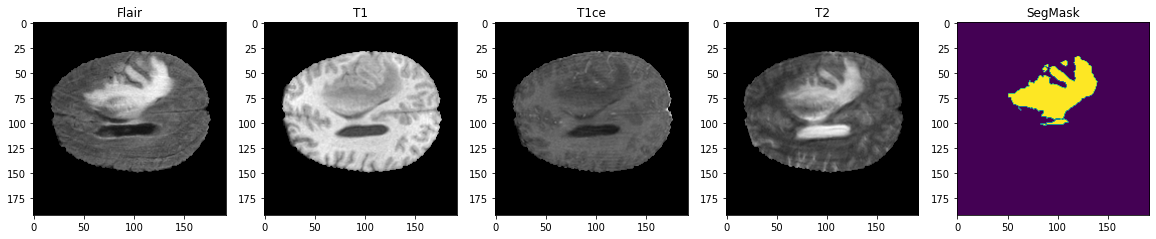

In [8]:
'''
========================
** Data Visualization **
========================
'''

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 10))
ax1.imshow(sample_image_flair[30:222, 30:222, 95 ], cmap = 'gray')
ax1.set_title('Flair')

ax2.imshow(sample_image_t1[30:222, 30:222, 95 ], cmap = 'gray')
ax2.set_title('T1')

ax3.imshow(sample_image_t1ce[30:222, 30:222, 95 ], cmap = 'gray')
ax3.set_title('T1ce')

ax4.imshow(sample_image_t2[30:222, 30:222, 95 ], cmap = 'gray')
ax4.set_title('T2')

ax5.imshow(sample_image_seg[30:222, 30:222, 95 ])
ax5.set_title('SegMask')


In [9]:
del(sample_image_flair)
del(sample_image_t1)
del(sample_image_t1ce)
del(sample_image_t2)
del(sample_image_seg)

# Dataset ( After Preprocessing )

In [10]:
# note --
# the dataset is already preprocessed and divided into stratified k folds with k = 5 
# The codes for preprocessing the data is available in Data Preprocessing Folder
# The preprocessing is done beforehand because it takes more than 2 hours to preprocess the entire data ( depends on CPU RAM)

# For extracting the dataset from .zip file -- DataExtraction.ipynb
# For creating the stratified k folds -- stratified_k_fold_data_creation.ipynb


In [11]:
'''
Explanation for preprocessing steps
===================================

1) The original data is available in => archive.zip (4GB)
   Link: 
   
2) Extracting the data in Dataset Folder
   Run --> DataExtraction.ipynb file
   
   

'''




# The folds data (.npz file format) is already presents in folds_data directory
# Following files will be generated after running stratified_k_fold_data_creation.ipynb file
'''

##########################################################
-- Dataset
   |____ folds_data
                |___ SKFold0_X.npz
                |___ SKFold0_y.npz
                |___ SKFold1_X.npz
                |___ SKFold1_Y.npz
                |___ SKFold2_X.npz
                |___ SKFold2_Y.npz
                |___ SKFold3_X.npz
                |___ SKFold3_Y.npz
                |___ SKFold4_X.npz
                |___ SKFold4_Y.npz
                |___ TestData_X.npz
                |___ TestData_Y.npz
                
-- Data_Preprocessing
                    |___training_data_ids_dict_1.pkl
                    |___stratified_k_folds_1.pkl
                    |___testing_data_ids_1.pkl
                    
#############################################################
                    
                    
                    



                    
The file includes following information
=======================================

1) training_data_ids_dict_1.pkl --> 
                
'''
    

'\n\n##########################################################\n-- Dataset\n   |____ folds_data\n                |___ SKFold0_X.npz\n                |___ SKFold0_y.npz\n                |___ SKFold1_X.npz\n                |___ SKFold1_Y.npz\n                |___ SKFold2_X.npz\n                |___ SKFold2_Y.npz\n                |___ SKFold3_X.npz\n                |___ SKFold3_Y.npz\n                |___ SKFold4_X.npz\n                |___ SKFold4_Y.npz\n                |___ TestData_X.npz\n                |___ TestData_Y.npz\n                \n-- Data_Preprocessing\n                    |___training_data_ids_dict_1.pkl\n                    |___stratified_k_folds_1.pkl\n                    |___testing_data_ids_1.pkl\n                    \n#############################################################\n                    \n                    \n                    \n\n\n\n                    \nThe file includes following information\n=======================================\n\n1) training_

In [12]:
import pickle
    
with open('../Data_Preprocessing/training_data_ids_dict_1.pkl', 'rb') as file:
      train_ids_dict = pickle.load(file)
        
with open('../Data_Preprocessing/stratified_k_folds_1.pkl', 'rb') as file:
      stratified_k_folds = pickle.load(file)

with open('../Data_Preprocessing/testing_data_ids_1.pkl', 'rb') as file:
      test_ids = pickle.load(file)

In [13]:
k_fold_split = 5

for key in train_ids_dict.keys():
    print(key, len(train_ids_dict[key]))

print("\n\n=======================================")
print("      No. of images in each fold       ")
print("=======================================")
for i in range(k_fold_split):
    print("Fold {} : {} images".format(i,  len(stratified_k_folds[i])))



(0,) 9663
(0, 1) 58
(0, 2) 5553
(0, 3) 39
(0, 1, 2) 1733
(0, 1, 3) 82
(0, 2, 3) 1141
(0, 1, 2, 3) 9993


      No. of images in each fold       
Fold 0 : 5648 images
Fold 1 : 5648 images
Fold 2 : 5648 images
Fold 3 : 5648 images
Fold 4 : 5648 images


# Building the model

In [14]:
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import to_categorical,normalize

In [15]:
# dice loss as defined above for 4 classes
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 4
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        coef = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
        if i == 0:
            total_coef = coef
        else:
            total_coef = total_coef + coef
    total_coef = total_coef / class_num
    return total_coef


def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

 
# define per class evaluation of dice coef
def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,1] * y_pred[:,:,:,1]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,1])) + K.sum(K.square(y_pred[:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,2] * y_pred[:,:,:,2]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,2])) + K.sum(K.square(y_pred[:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,3] * y_pred[:,:,:,3]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,3])) + K.sum(K.square(y_pred[:,:,:,3])) + epsilon)

def dice_coef_notTumor(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,0] * y_pred[:,:,:,0]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,0])) + K.sum(K.square(y_pred[:,:,:,0])) + epsilon)


# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    
# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [16]:
IMG_SIZE = 192

In [17]:
############################################ U-net #############################################

############ Encoder ##############################
input_ = Input(shape=(192, 192,4),name='input')                                              

block1_conv1 = Conv2D(64,3,padding='same',activation='relu',name='block1_conv1')(input_)
block1_conv2 = Conv2D(64,3,padding='same',activation='relu',name='block1_conv2')(block1_conv1)
block1_norm = BatchNormalization(name='block1_batch_norm')(block1_conv2)
block1_pool = MaxPooling2D(name='block1_pool')(block1_norm)

block2_conv1 = Conv2D(128,3,padding='same',activation='relu',name='block2_conv1')(block1_pool)
block2_conv2 = Conv2D(128,3,padding='same',activation='relu',name='block2_conv2')(block2_conv1)
block2_norm = BatchNormalization(name='block2_batch_norm')(block2_conv2)
block2_pool = MaxPooling2D(name='block2_pool')(block2_norm)

encoder_dropout_1 = Dropout(0.2,name='encoder_dropout_1')(block2_pool)

block3_conv1 = Conv2D(256,3,padding='same',activation='relu',name='block3_conv1')(encoder_dropout_1)
block3_conv2 = Conv2D(256,3,padding='same',activation='relu',name='block3_conv2')(block3_conv1)
block3_norm = BatchNormalization(name='block3_batch_norm')(block3_conv2)
block3_pool = MaxPooling2D(name='block3_pool')(block3_norm)

block4_conv1 = Conv2D(512,3,padding='same',activation='relu',name='block4_conv1')(block3_pool)
block4_conv2 = Conv2D(512,3,padding='same',activation='relu',name='block4_conv2')(block4_conv1)
block4_norm = BatchNormalization(name='block4_batch_norm')(block4_conv2)
block4_pool = MaxPooling2D(name='block4_pool')(block4_norm)


################### Encoder end ######################

block5_conv1 = Conv2D(1024,3,padding='same',activation='relu',name='block5_conv1')(block4_pool)

########### Decoder #################################

up_pool1 = Conv2DTranspose(1024,3,strides = (2, 2),padding='same',activation='relu',name='up_pool1')(block5_conv1)
merged_block1 = concatenate([block4_norm,up_pool1],name='merged_block1')
decod_block1_conv1 = Conv2D(512,3, padding = 'same', activation='relu',name='decod_block1_conv1')(merged_block1)

up_pool2 = Conv2DTranspose(512,3,strides = (2, 2),padding='same',activation='relu',name='up_pool2')(decod_block1_conv1)
merged_block2 = concatenate([block3_norm,up_pool2],name='merged_block2')
decod_block2_conv1 = Conv2D(256,3,padding = 'same',activation='relu',name='decod_block2_conv1')(merged_block2)

decoder_dropout_1 = Dropout(0.2,name='decoder_dropout_1')(decod_block2_conv1)

up_pool3 = Conv2DTranspose(256,3,strides = (2, 2),padding='same',activation='relu',name='up_pool3')(decoder_dropout_1)
merged_block3 = concatenate([block2_norm,up_pool3],name='merged_block3')
decod_block3_conv1 = Conv2D(128,3,padding = 'same',activation='relu',name='decod_block3_conv1')(merged_block3)

up_pool4 = Conv2DTranspose(128,3,strides = (2, 2),padding='same',activation='relu',name='up_pool4')(decod_block3_conv1)
merged_block4 = concatenate([block1_norm,up_pool4],name='merged_block4')
decod_block4_conv1 = Conv2D(64,3,padding = 'same',activation='relu',name='decod_block4_conv1')(merged_block4)
############ Decoder End ######################################


pre_output = Conv2D(64,1,padding = 'same',activation='relu',name='pre_output')(decod_block4_conv1)

output = Conv2D(4,1,padding='same',activation='softmax',name='output')(pre_output)

model = Model(inputs = input_, outputs = output)
model.compile(loss=dice_coef_loss, optimizer=keras.optimizers.Adam(learning_rate=1e-6), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_notTumor, dice_coef_necrotic, dice_coef_edema ,dice_coef_enhancing] )
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 192, 192, 4) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 192, 192, 64) 2368        input[0][0]                      
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 192, 192, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_batch_norm (BatchNormali (None, 192, 192, 64) 256         block1_conv2[0][0]               
______________________________________________________________________________________________

In [18]:
plot_model(model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [19]:
plt.savefig("unet_model_192x192_32slices_4modalities_layers0.png")

<Figure size 432x288 with 0 Axes>

# Model Training with Stratified K fold Cross Validation -- ( k = 5 )

In [20]:
callbacks = [
#       keras.callbacks.ReduceLROnPlateau(monitor='dice_coef', factor=0.2, patience=2, min_lr=0.000001, verbose=1),
      keras.callbacks.ModelCheckpoint(filepath = './weights/unet_model_skf.{epoch:02d}-{dice_coef:.6f}.h5', mode='max', monitor='dice_coef',
                                      verbose=1, save_weights_only = True)
]

In [21]:
model.load_weights('./weights/unet_model_skf.15-0.863515.h5')

In [22]:
K.clear_session()


              Iteration 0                

Validation Split is : Fold 0
------------------------------------------
Loading Fold 0
Loading Fold 1
Loading Fold 2
Loading Fold 3
Loading Fold 4
X_train shape : (22592, 192, 192, 4)
Y_train shape : (22592, 192, 192, 4)
X_val shape   : (5648, 192, 192, 4)
Y_val shape : (5648, 192, 192, 4)


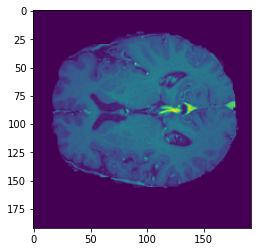

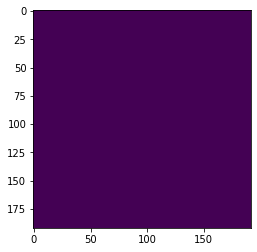

Epoch 1/15
706/706 [==============================] - 164s 211ms/step - loss: 0.1324 - accuracy: 0.9928 - mean_io_u: 0.9622 - dice_coef: 0.8676 - precision: 0.9929 - sensitivity: 0.9928 - specificity: 0.9976 - dice_coef_notTumor: 0.9976 - dice_coef_necrotic: 0.8423 - dice_coef_edema: 0.8420 - dice_coef_enhancing: 0.8561 - val_loss: 0.3213 - val_accuracy: 0.9927 - val_mean_io_u: 0.9606 - val_dice_coef: 0.6793 - val_precision: 0.9928 - val_sensitivity: 0.9927 - val_specificity: 0.9976 - val_dice_coef_notTumor: 0.9976 - val_dice_coef_necrotic: 0.3631 - val_dice_coef_edema: 0.5583 - val_dice_coef_enhancing: 0.3456

Epoch 00001: saving model to ./weights/unet_model_skf.01-0.866347.h5
Epoch 2/15
706/706 [==============================] - 123s 174ms/step - loss: 0.1320 - accuracy: 0.9929 - mean_io_u: 0.9630 - dice_coef: 0.8680 - precision: 0.9930 - sensitivity: 0.9929 - specificity: 0.9977 - dice_coef_notTumor: 0.9977 - dice_coef_necrotic: 0.8387 - dice_coef_edema: 0.8440 - dice_coef_enhancin

706/706 [==============================] - 120s 170ms/step - loss: 0.1071 - accuracy: 0.9942 - mean_io_u: 0.9717 - dice_coef: 0.8929 - precision: 0.9942 - sensitivity: 0.9941 - specificity: 0.9981 - dice_coef_notTumor: 0.9981 - dice_coef_necrotic: 0.8763 - dice_coef_edema: 0.8716 - dice_coef_enhancing: 0.8800 - val_loss: 0.2898 - val_accuracy: 0.9940 - val_mean_io_u: 0.9698 - val_dice_coef: 0.7108 - val_precision: 0.9941 - val_sensitivity: 0.9940 - val_specificity: 0.9980 - val_dice_coef_notTumor: 0.9980 - val_dice_coef_necrotic: 0.3753 - val_dice_coef_edema: 0.5762 - val_dice_coef_enhancing: 0.3548

Epoch 00013: saving model to ./weights/unet_model_skf.13-0.892797.h5
Epoch 14/15
706/706 [==============================] - 121s 171ms/step - loss: 0.1053 - accuracy: 0.9943 - mean_io_u: 0.9722 - dice_coef: 0.8947 - precision: 0.9943 - sensitivity: 0.9943 - specificity: 0.9981 - dice_coef_notTumor: 0.9981 - dice_coef_necrotic: 0.8780 - dice_coef_edema: 0.8740 - dice_coef_enhancing: 0.8827 

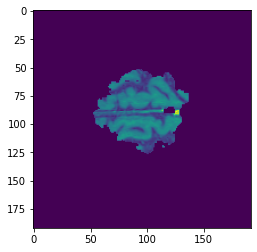

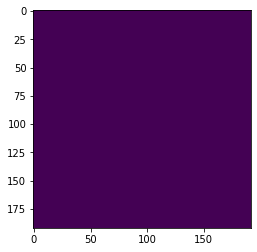

Epoch 1/15
706/706 [==============================] - 124s 174ms/step - loss: 0.1051 - accuracy: 0.9943 - mean_io_u: 0.9737 - dice_coef: 0.8949 - precision: 0.9944 - sensitivity: 0.9943 - specificity: 0.9981 - dice_coef_notTumor: 0.9982 - dice_coef_necrotic: 0.8762 - dice_coef_edema: 0.8745 - dice_coef_enhancing: 0.8832 - val_loss: 0.2599 - val_accuracy: 0.9946 - val_mean_io_u: 0.9705 - val_dice_coef: 0.7405 - val_precision: 0.9946 - val_sensitivity: 0.9946 - val_specificity: 0.9982 - val_dice_coef_notTumor: 0.9982 - val_dice_coef_necrotic: 0.3800 - val_dice_coef_edema: 0.5849 - val_dice_coef_enhancing: 0.3614

Epoch 00001: saving model to ./weights/unet_model_skf.01-0.894869.h5
Epoch 2/15
706/706 [==============================] - 120s 170ms/step - loss: 0.1028 - accuracy: 0.9944 - mean_io_u: 0.9740 - dice_coef: 0.8972 - precision: 0.9944 - sensitivity: 0.9944 - specificity: 0.9981 - dice_coef_notTumor: 0.9982 - dice_coef_necrotic: 0.8813 - dice_coef_edema: 0.8764 - dice_coef_enhancin

706/706 [==============================] - 120s 170ms/step - loss: 0.0909 - accuracy: 0.9951 - mean_io_u: 0.9783 - dice_coef: 0.9091 - precision: 0.9951 - sensitivity: 0.9951 - specificity: 0.9984 - dice_coef_notTumor: 0.9984 - dice_coef_necrotic: 0.8939 - dice_coef_edema: 0.8907 - dice_coef_enhancing: 0.8982 - val_loss: 0.2419 - val_accuracy: 0.9951 - val_mean_io_u: 0.9740 - val_dice_coef: 0.7586 - val_precision: 0.9951 - val_sensitivity: 0.9950 - val_specificity: 0.9984 - val_dice_coef_notTumor: 0.9984 - val_dice_coef_necrotic: 0.3848 - val_dice_coef_edema: 0.5914 - val_dice_coef_enhancing: 0.3656

Epoch 00013: saving model to ./weights/unet_model_skf.13-0.909097.h5
Epoch 14/15
706/706 [==============================] - 120s 170ms/step - loss: 0.0903 - accuracy: 0.9951 - mean_io_u: 0.9786 - dice_coef: 0.9097 - precision: 0.9951 - sensitivity: 0.9951 - specificity: 0.9984 - dice_coef_notTumor: 0.9984 - dice_coef_necrotic: 0.8943 - dice_coef_edema: 0.8918 - dice_coef_enhancing: 0.8987 

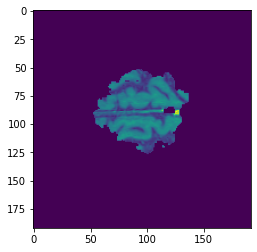

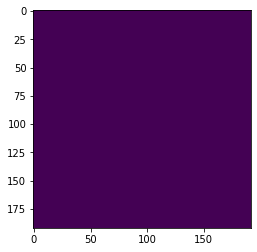

Epoch 1/15
706/706 [==============================] - 122s 173ms/step - loss: 0.0892 - accuracy: 0.9952 - mean_io_u: 0.9795 - dice_coef: 0.9108 - precision: 0.9952 - sensitivity: 0.9952 - specificity: 0.9984 - dice_coef_notTumor: 0.9984 - dice_coef_necrotic: 0.8953 - dice_coef_edema: 0.8926 - dice_coef_enhancing: 0.9002 - val_loss: 0.2350 - val_accuracy: 0.9953 - val_mean_io_u: 0.9764 - val_dice_coef: 0.7655 - val_precision: 0.9953 - val_sensitivity: 0.9953 - val_specificity: 0.9984 - val_dice_coef_notTumor: 0.9985 - val_dice_coef_necrotic: 0.3886 - val_dice_coef_edema: 0.5943 - val_dice_coef_enhancing: 0.3670

Epoch 00001: saving model to ./weights/unet_model_skf.01-0.910809.h5
Epoch 2/15
706/706 [==============================] - 119s 169ms/step - loss: 0.0886 - accuracy: 0.9952 - mean_io_u: 0.9798 - dice_coef: 0.9114 - precision: 0.9952 - sensitivity: 0.9952 - specificity: 0.9984 - dice_coef_notTumor: 0.9985 - dice_coef_necrotic: 0.8955 - dice_coef_edema: 0.8935 - dice_coef_enhancin

706/706 [==============================] - 119s 169ms/step - loss: 0.0813 - accuracy: 0.9956 - mean_io_u: 0.9825 - dice_coef: 0.9187 - precision: 0.9956 - sensitivity: 0.9956 - specificity: 0.9985 - dice_coef_notTumor: 0.9986 - dice_coef_necrotic: 0.9044 - dice_coef_edema: 0.9026 - dice_coef_enhancing: 0.9075 - val_loss: 0.2511 - val_accuracy: 0.9955 - val_mean_io_u: 0.9799 - val_dice_coef: 0.7495 - val_precision: 0.9955 - val_sensitivity: 0.9955 - val_specificity: 0.9985 - val_dice_coef_notTumor: 0.9985 - val_dice_coef_necrotic: 0.3891 - val_dice_coef_edema: 0.5971 - val_dice_coef_enhancing: 0.3683

Epoch 00013: saving model to ./weights/unet_model_skf.13-0.918683.h5
Epoch 14/15
706/706 [==============================] - 119s 169ms/step - loss: 0.0804 - accuracy: 0.9956 - mean_io_u: 0.9828 - dice_coef: 0.9196 - precision: 0.9957 - sensitivity: 0.9956 - specificity: 0.9986 - dice_coef_notTumor: 0.9986 - dice_coef_necrotic: 0.9051 - dice_coef_edema: 0.9039 - dice_coef_enhancing: 0.9088 

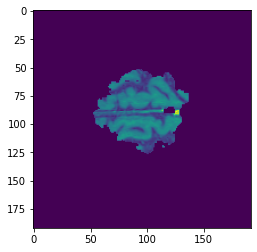

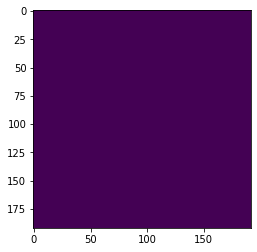

Epoch 1/15
706/706 [==============================] - 123s 174ms/step - loss: 0.0803 - accuracy: 0.9957 - mean_io_u: 0.9831 - dice_coef: 0.9197 - precision: 0.9957 - sensitivity: 0.9956 - specificity: 0.9986 - dice_coef_notTumor: 0.9986 - dice_coef_necrotic: 0.9054 - dice_coef_edema: 0.9036 - dice_coef_enhancing: 0.9087 - val_loss: 0.2168 - val_accuracy: 0.9958 - val_mean_io_u: 0.9815 - val_dice_coef: 0.7836 - val_precision: 0.9958 - val_sensitivity: 0.9958 - val_specificity: 0.9986 - val_dice_coef_notTumor: 0.9986 - val_dice_coef_necrotic: 0.3916 - val_dice_coef_edema: 0.6010 - val_dice_coef_enhancing: 0.3706

Epoch 00001: saving model to ./weights/unet_model_skf.01-0.919721.h5
Epoch 2/15
706/706 [==============================] - 120s 170ms/step - loss: 0.0797 - accuracy: 0.9957 - mean_io_u: 0.9833 - dice_coef: 0.9203 - precision: 0.9957 - sensitivity: 0.9957 - specificity: 0.9986 - dice_coef_notTumor: 0.9986 - dice_coef_necrotic: 0.9065 - dice_coef_edema: 0.9043 - dice_coef_enhancin

706/706 [==============================] - 120s 170ms/step - loss: 0.0747 - accuracy: 0.9960 - mean_io_u: 0.9852 - dice_coef: 0.9253 - precision: 0.9960 - sensitivity: 0.9960 - specificity: 0.9987 - dice_coef_notTumor: 0.9987 - dice_coef_necrotic: 0.9115 - dice_coef_edema: 0.9105 - dice_coef_enhancing: 0.9142 - val_loss: 0.2195 - val_accuracy: 0.9960 - val_mean_io_u: 0.9840 - val_dice_coef: 0.7809 - val_precision: 0.9960 - val_sensitivity: 0.9960 - val_specificity: 0.9987 - val_dice_coef_notTumor: 0.9987 - val_dice_coef_necrotic: 0.3922 - val_dice_coef_edema: 0.6031 - val_dice_coef_enhancing: 0.3715

Epoch 00013: saving model to ./weights/unet_model_skf.13-0.925283.h5
Epoch 14/15
706/706 [==============================] - 120s 170ms/step - loss: 0.0743 - accuracy: 0.9960 - mean_io_u: 0.9853 - dice_coef: 0.9257 - precision: 0.9960 - sensitivity: 0.9960 - specificity: 0.9987 - dice_coef_notTumor: 0.9987 - dice_coef_necrotic: 0.9115 - dice_coef_edema: 0.9112 - dice_coef_enhancing: 0.9148 

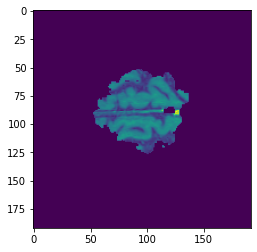

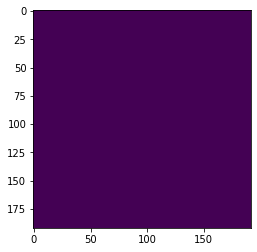

Epoch 1/15
706/706 [==============================] - 123s 173ms/step - loss: 0.0743 - accuracy: 0.9960 - mean_io_u: 0.9856 - dice_coef: 0.9257 - precision: 0.9960 - sensitivity: 0.9960 - specificity: 0.9987 - dice_coef_notTumor: 0.9987 - dice_coef_necrotic: 0.9121 - dice_coef_edema: 0.9106 - dice_coef_enhancing: 0.9147 - val_loss: 0.1899 - val_accuracy: 0.9962 - val_mean_io_u: 0.9841 - val_dice_coef: 0.8104 - val_precision: 0.9962 - val_sensitivity: 0.9962 - val_specificity: 0.9987 - val_dice_coef_notTumor: 0.9988 - val_dice_coef_necrotic: 0.3952 - val_dice_coef_edema: 0.6067 - val_dice_coef_enhancing: 0.3747

Epoch 00001: saving model to ./weights/unet_model_skf.01-0.925692.h5
Epoch 2/15
706/706 [==============================] - 119s 169ms/step - loss: 0.0741 - accuracy: 0.9960 - mean_io_u: 0.9858 - dice_coef: 0.9259 - precision: 0.9960 - sensitivity: 0.9960 - specificity: 0.9987 - dice_coef_notTumor: 0.9987 - dice_coef_necrotic: 0.9120 - dice_coef_edema: 0.9111 - dice_coef_enhancin

706/706 [==============================] - 119s 169ms/step - loss: 0.0704 - accuracy: 0.9962 - mean_io_u: 0.9870 - dice_coef: 0.9296 - precision: 0.9962 - sensitivity: 0.9962 - specificity: 0.9987 - dice_coef_notTumor: 0.9988 - dice_coef_necrotic: 0.9162 - dice_coef_edema: 0.9157 - dice_coef_enhancing: 0.9184 - val_loss: 0.1883 - val_accuracy: 0.9963 - val_mean_io_u: 0.9858 - val_dice_coef: 0.8120 - val_precision: 0.9963 - val_sensitivity: 0.9963 - val_specificity: 0.9988 - val_dice_coef_notTumor: 0.9988 - val_dice_coef_necrotic: 0.3952 - val_dice_coef_edema: 0.6076 - val_dice_coef_enhancing: 0.3746

Epoch 00013: saving model to ./weights/unet_model_skf.13-0.929564.h5
Epoch 14/15
706/706 [==============================] - 119s 169ms/step - loss: 0.0701 - accuracy: 0.9962 - mean_io_u: 0.9871 - dice_coef: 0.9299 - precision: 0.9962 - sensitivity: 0.9962 - specificity: 0.9987 - dice_coef_notTumor: 0.9988 - dice_coef_necrotic: 0.9163 - dice_coef_edema: 0.9161 - dice_coef_enhancing: 0.9191 

In [23]:
for k in range(k_fold_split):
    val_id = k % k_fold_split
    
    print("==========================================")
    print("              Iteration {}                ".format(k))
    print("==========================================\n")
    print("Validation Split is : Fold {}".format(val_id))
    print("------------------------------------------")
    
    X_train = None
    Y_train = None
    X_val = None
    Y_val = None
    
    for kid in range(5):
        print("Loading Fold {}".format(kid))
        if kid == val_id:
            X_val = np.load("../Dataset/folds_data/SKFold{}_X.npz".format(kid))
            X_val = X_val['arr_0']
            Y_val = np.load("../Dataset/folds_data/SKFold{}_Y.npz".format(kid))
            Y_val = Y_val['arr_0']
            
        else:
            if X_train is None:
                X_train = np.load("../Dataset/folds_data/SKFold{}_X.npz".format(kid))
                X_train = X_train['arr_0']
                Y_train = np.load("../Dataset/folds_data/SKFold{}_Y.npz".format(kid))
                Y_train = Y_train['arr_0']
                
            else:
                xtraindata = np.load("../Dataset/folds_data/SKFold{}_X.npz".format(kid))
                xtraindata = xtraindata['arr_0']
                ytraindata = np.load("../Dataset/folds_data/SKFold{}_Y.npz".format(kid))
                ytraindata = ytraindata['arr_0']
                
                X_train = np.append(X_train, xtraindata, axis = 0)
                Y_train = np.append(Y_train, ytraindata, axis = 0)
                
    
    Y_train = to_categorical(Y_train)
    Y_val = to_categorical(Y_val)
    X_train = (X_train-np.mean(X_train))/np.max(X_train)
    X_val = (X_val-np.mean(X_val))/np.max(X_val)

    print("X_train shape : {}".format(X_train.shape))
    print("Y_train shape : {}".format(Y_train.shape))
    print("X_val shape   : {}".format(X_val.shape))
    print("Y_val shape : {}".format(Y_val.shape)) 
    
    plt.imshow(X_train[1,:,:,1])
    plt.show()
    plt.imshow(Y_train[1,:,:,3])
    plt.show()
    
    history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size=32,epochs=15,callbacks=callbacks,shuffle=True)
    np.save('Unetmodel_SKF_history_Iteration{}.npy'.format(k),dict(history.history), allow_pickle=True)
    model.save('Unetmodel_SKF_Iteration{}.h5'.format(k))
    

In [24]:
# model.save('Unetmodel_SKF.h5')

In [25]:
# np.save('Unetmodel_SKF_history.npy', dict(history.history), allow_pickle=True)

# Evaluation of the model

In [26]:
# loading the test data
X_test = np.load("../Dataset/folds_data/TestData_X.npz")
X_test = X_test['arr_0']
Y_test = np.load("../Dataset/folds_data/TestData_Y.npz")
Y_test = Y_test['arr_0']

Y_test = to_categorical(Y_test)

print("X_test shape : {}".format(X_test.shape))
print("Y_test shape : {}".format(Y_test.shape))

X_test shape : (7066, 192, 192, 4)
Y_test shape : (7066, 192, 192, 4)


In [28]:
# loading the best weights in the model
model.load_weights('./weights/unet_model_skf.14-0.929942.h5')

In [29]:
results = model.evaluate(X_test, Y_test)

221/221 [==============================] - 15s 65ms/step - loss: 0.5801 - accuracy: 0.9742 - mean_io_u: 0.9660 - dice_coef: 0.4198 - precision: 0.9742 - sensitivity: 0.9742 - specificity: 0.9914 - dice_coef_notTumor: 0.9875 - dice_coef_necrotic: 0.2429 - dice_coef_edema: 0.1597 - dice_coef_enhancing: 0.2889


In [30]:
results

[0.580115020275116,
 0.9741584062576294,
 0.9660141468048096,
 0.41979148983955383,
 0.9741525053977966,
 0.9741524457931519,
 0.9913841485977173,
 0.9875198006629944,
 0.24288895726203918,
 0.15972834825515747,
 0.2888696789741516]

In [31]:
# again loading the original Y_test 
Y_test = np.load("../Dataset/folds_data/TestData_Y.npz")
Y_test = Y_test['arr_0']

# Predicting the output
# The y_pred will of the dimension (7066, 192, 192) rather than (7066, 192, 192, 4)
Y_pred = np.argmax(model.predict(X_test), axis=-1)

print("Y_test shape : {} ".format(Y_test.shape))
print("Y_pred shape : {} ".format(Y_pred.shape))

# converting the shape of y_pred to (7066, 192, 192, 1)
Y_pred = Y_pred.reshape(-1, 192, 192, 1)
print("After reshaping the prediction results")
print("Y_test shape : {} ".format(Y_test.shape))
print("Y_pred shape : {} ".format(Y_pred.shape))


Y_test shape : (7066, 192, 192, 1) 
Y_pred shape : (7066, 192, 192) 
After reshaping the prediction results
Y_test shape : (7066, 192, 192, 1) 
Y_pred shape : (7066, 192, 192, 1) 


# Visualization of Predictions

<ipython-input-34-78c3924f3c96>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))


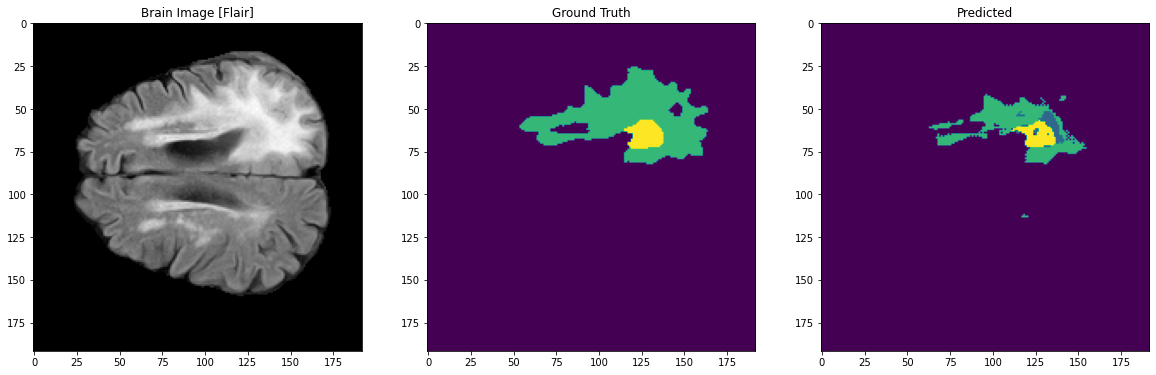

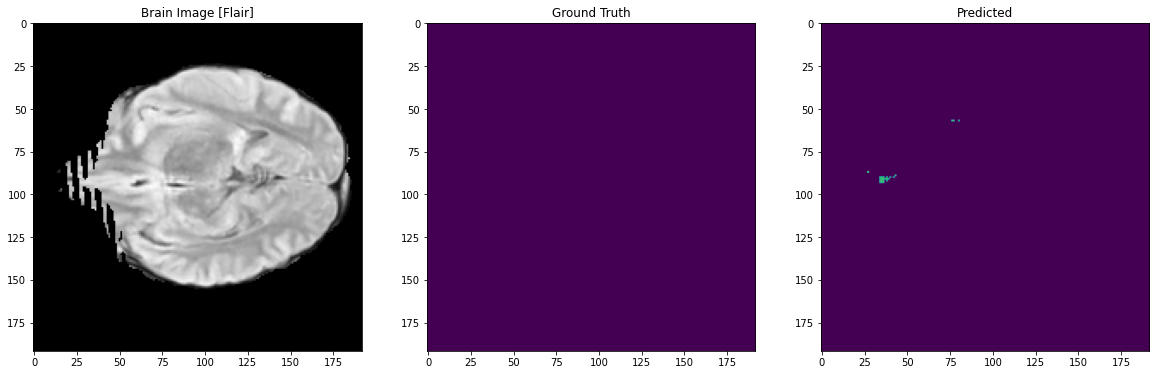

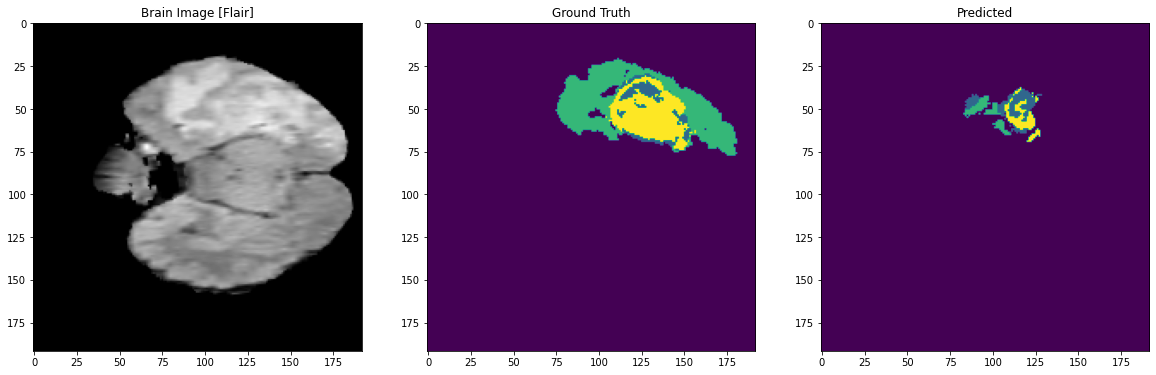

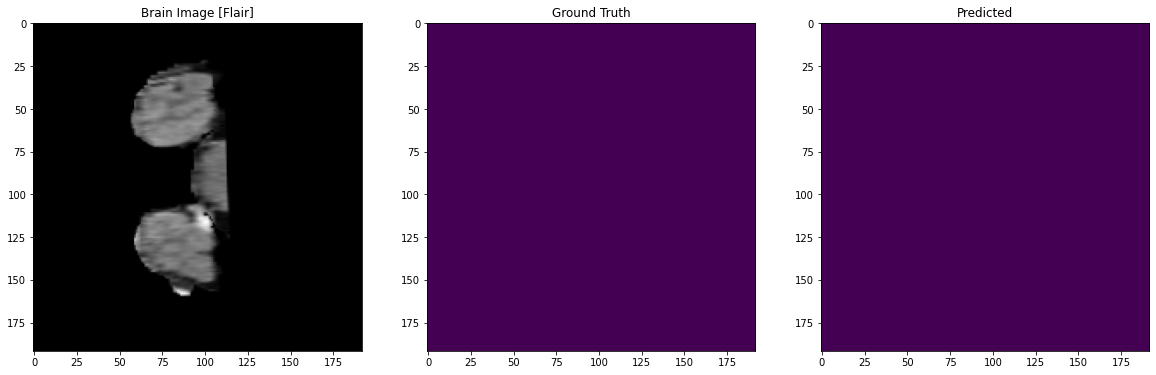

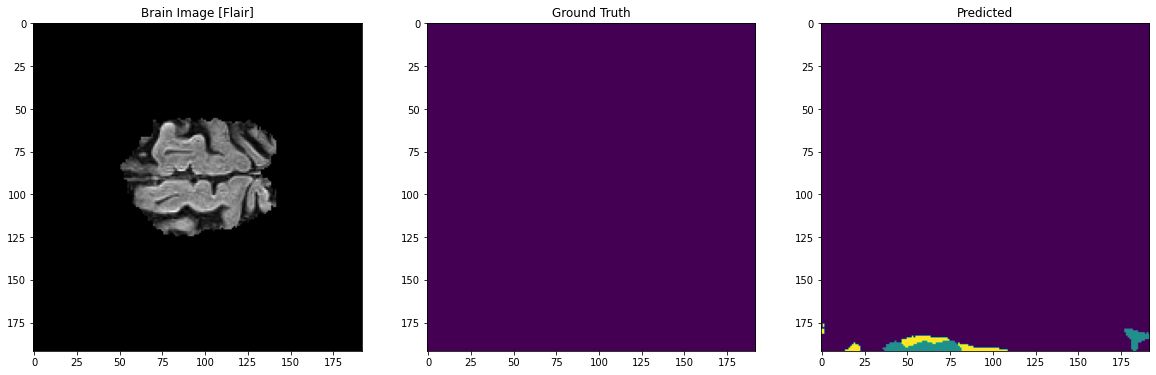

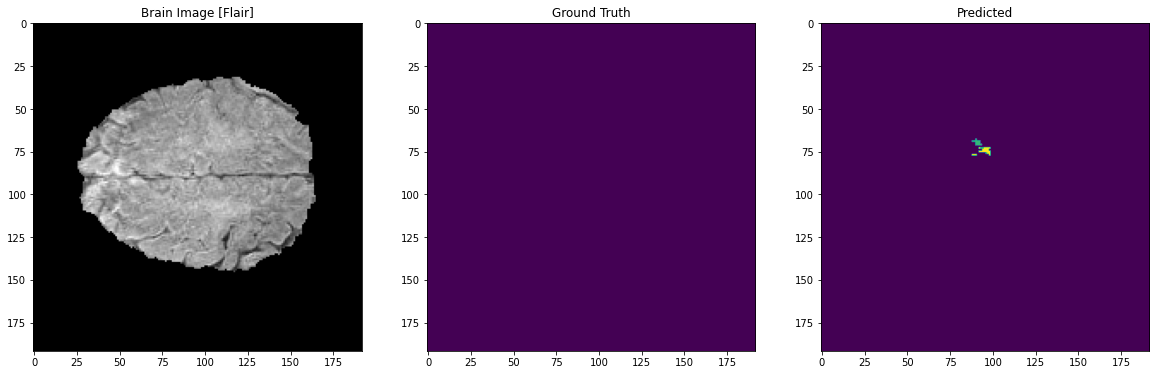

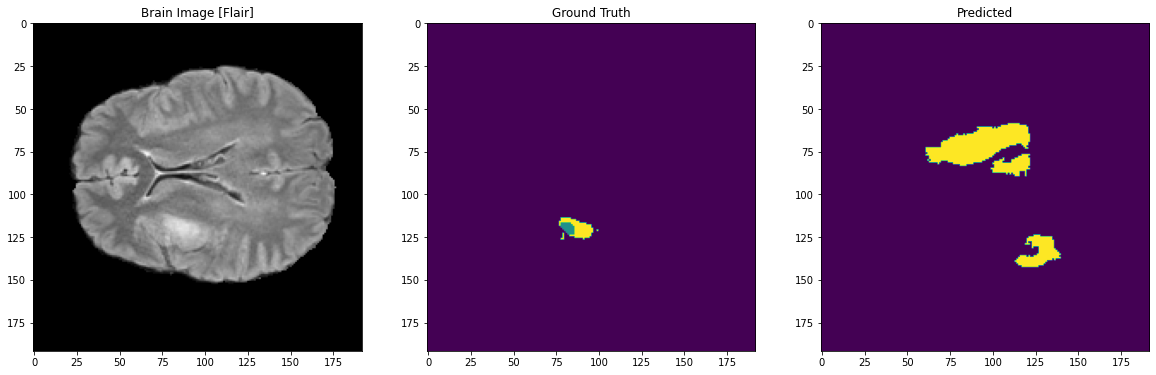

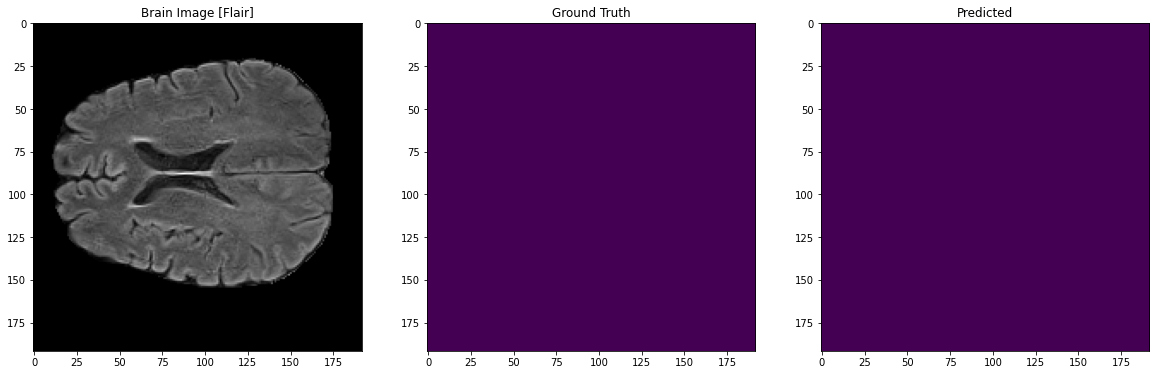

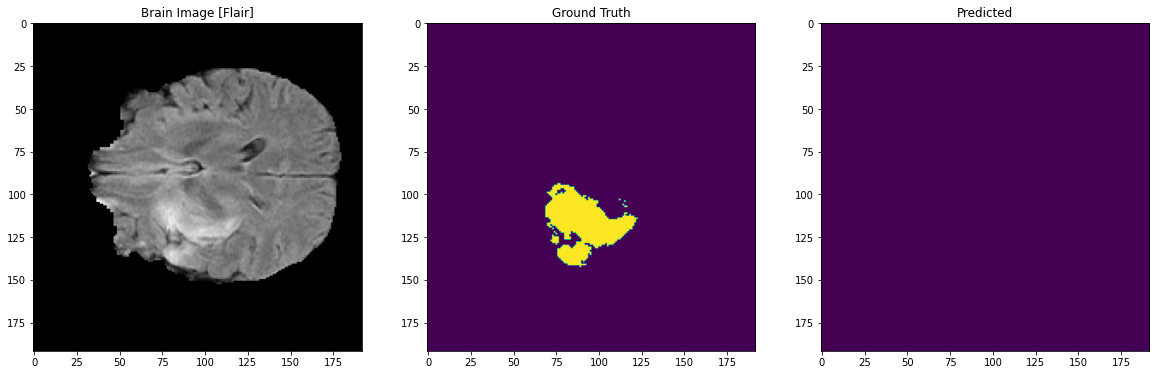

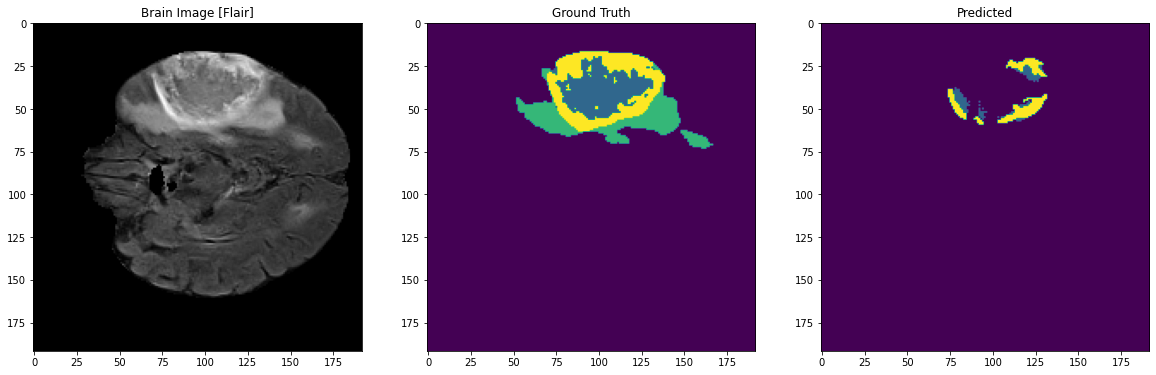

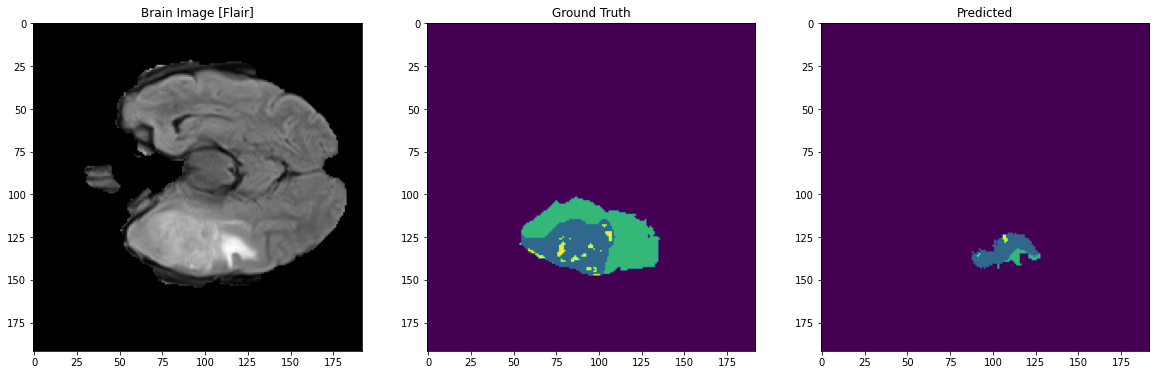

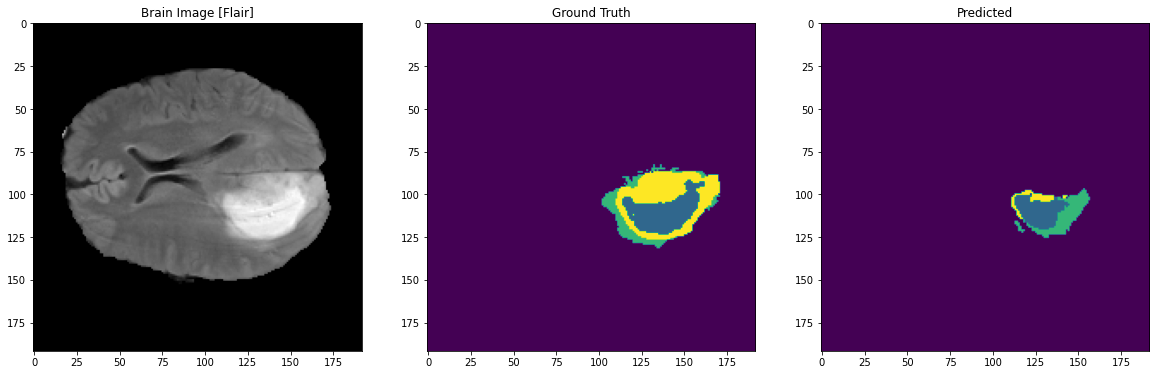

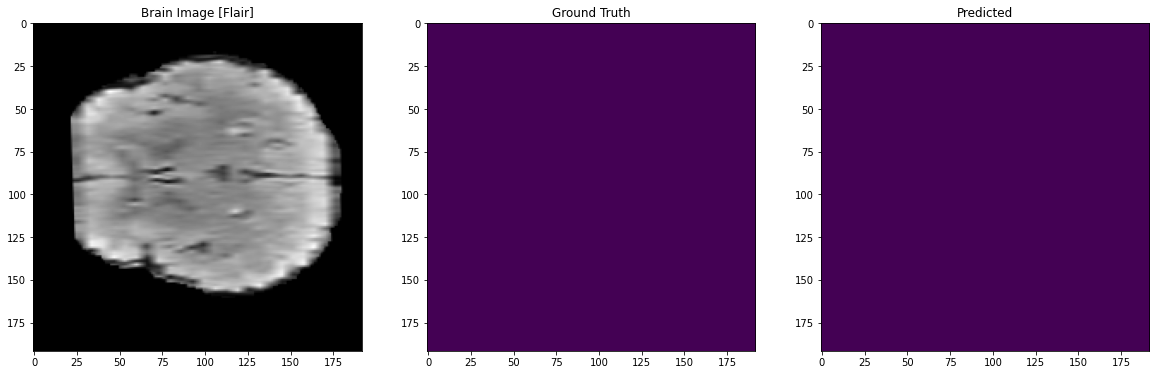

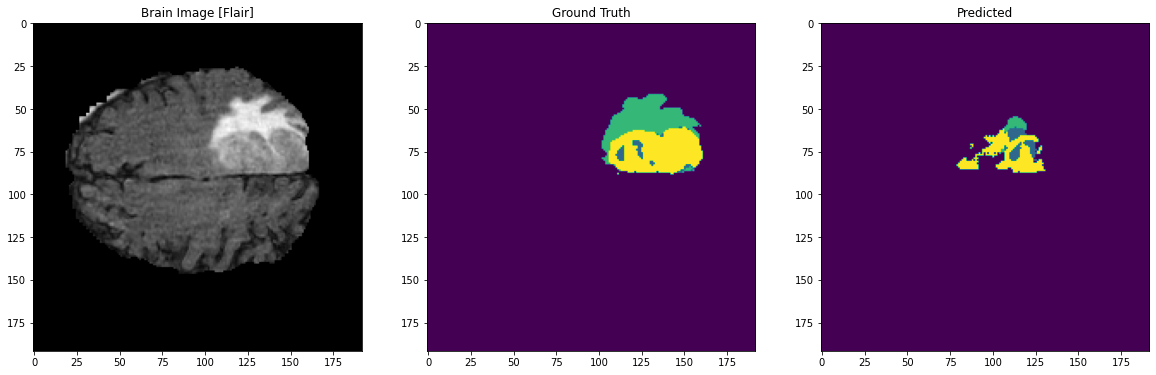

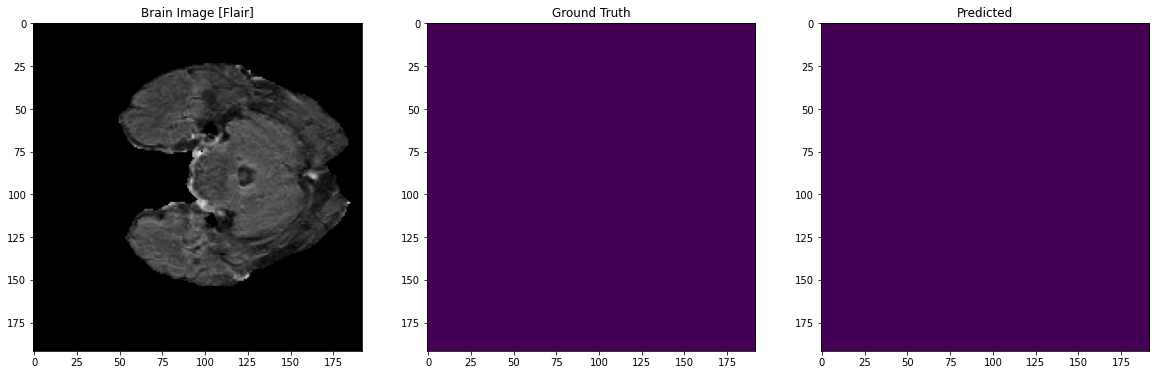

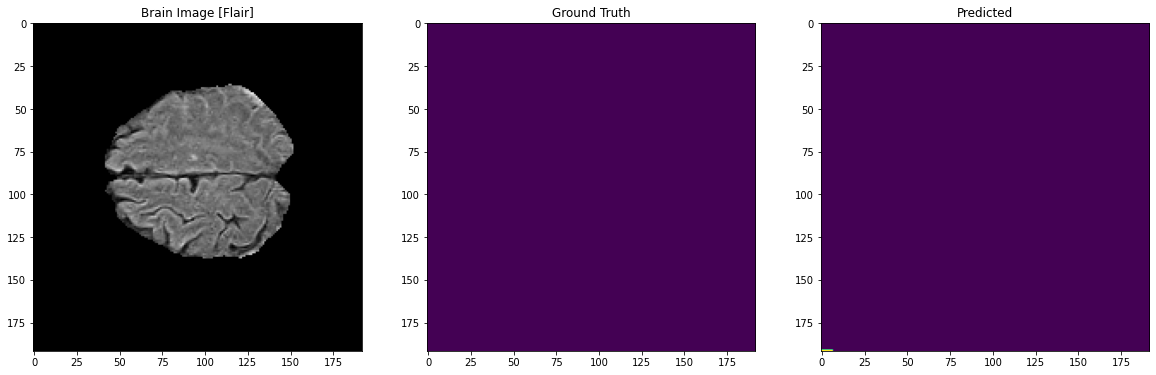

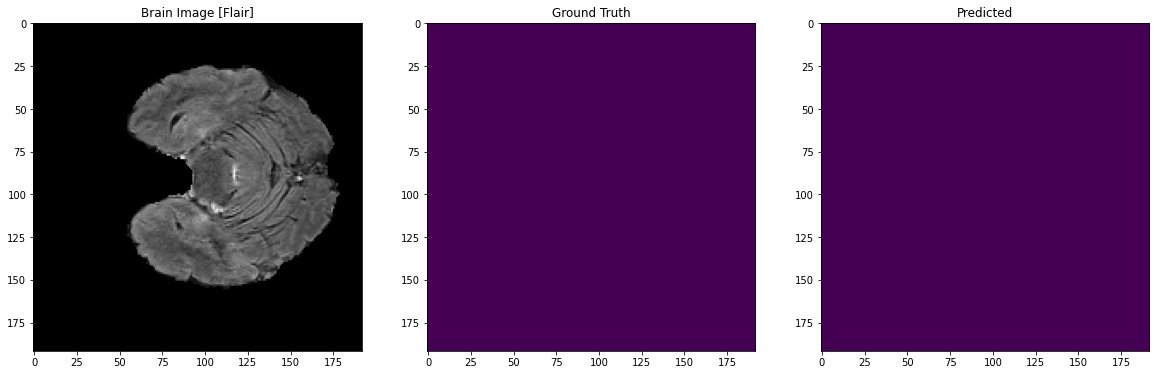

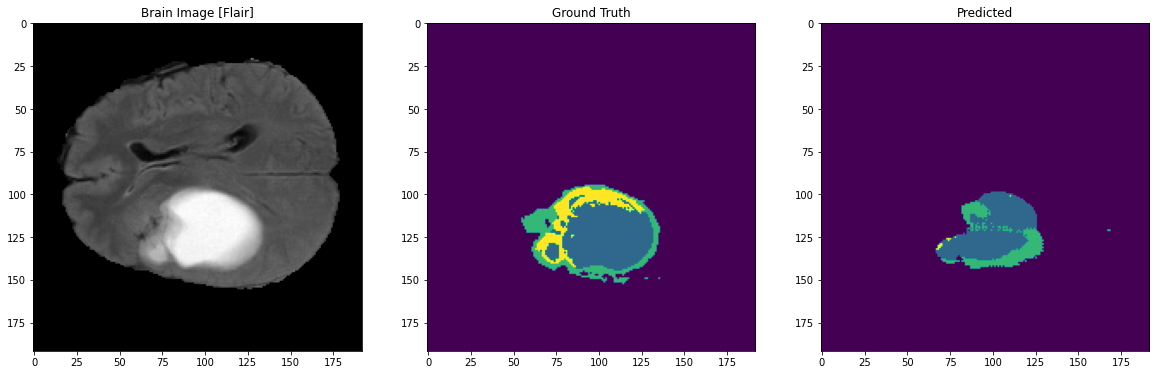

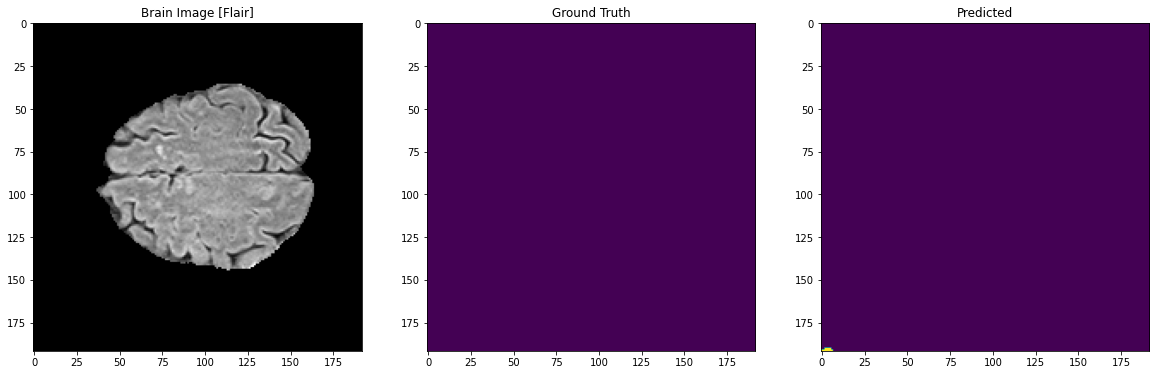

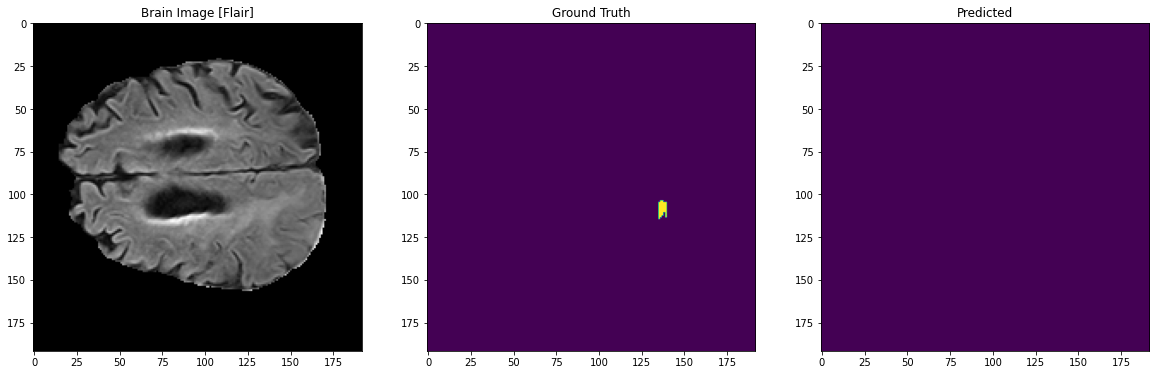

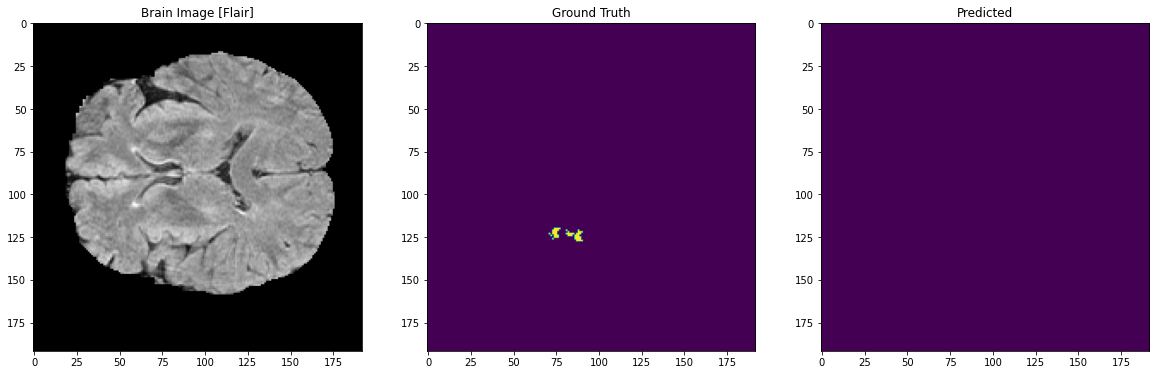

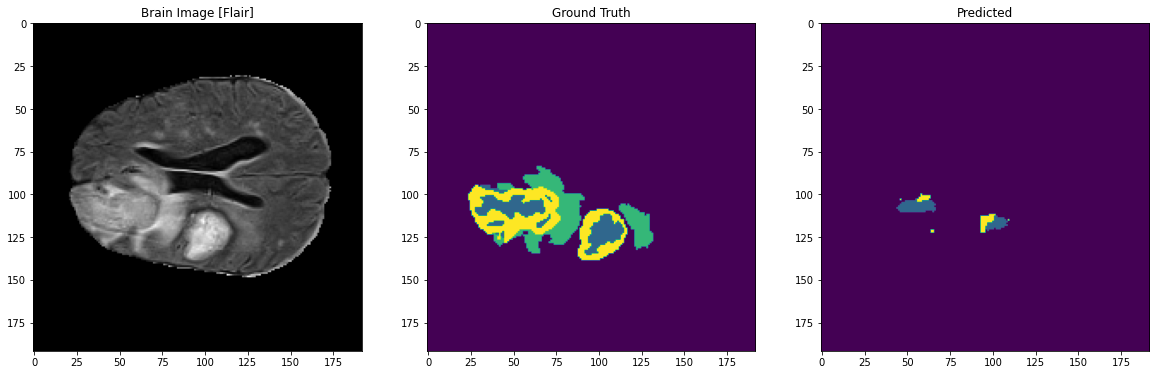

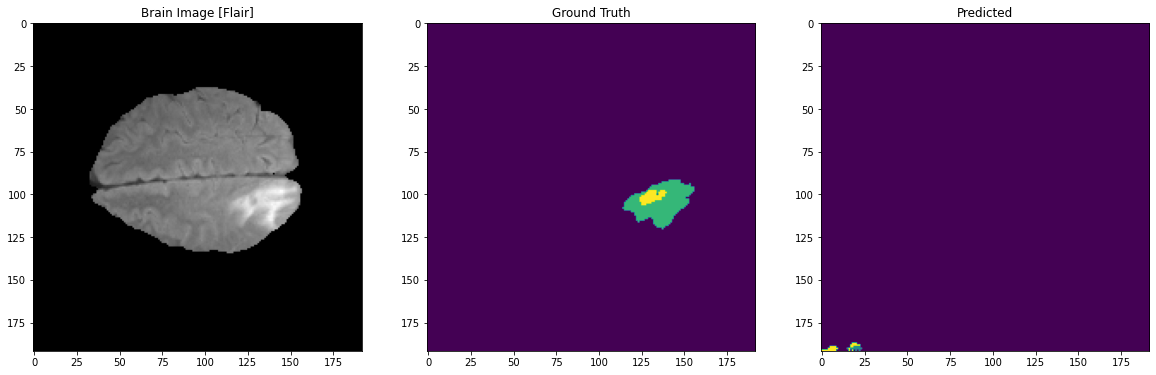

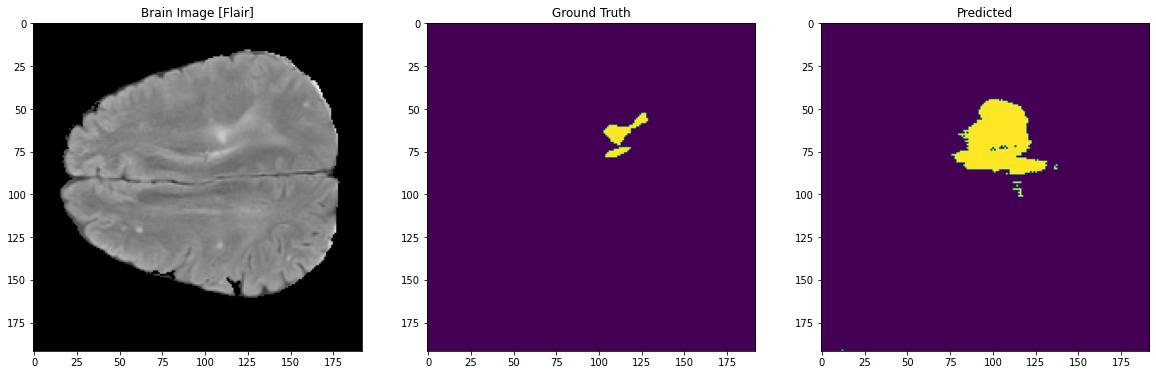

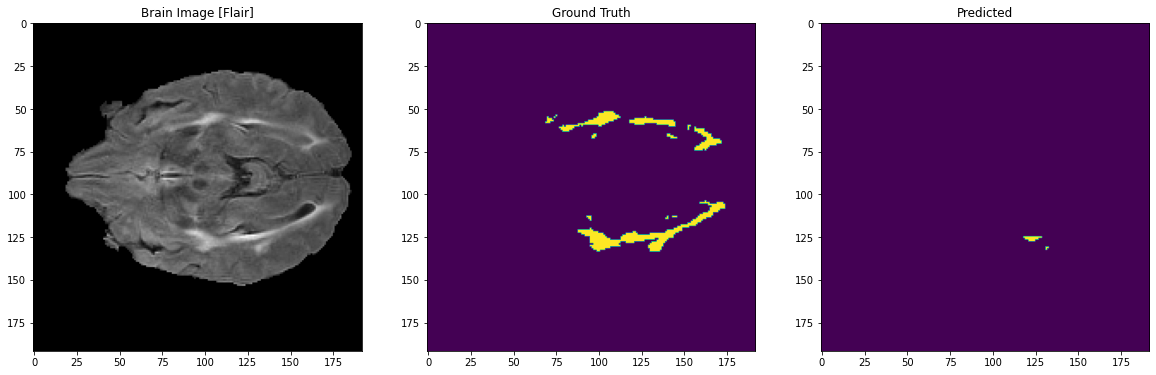

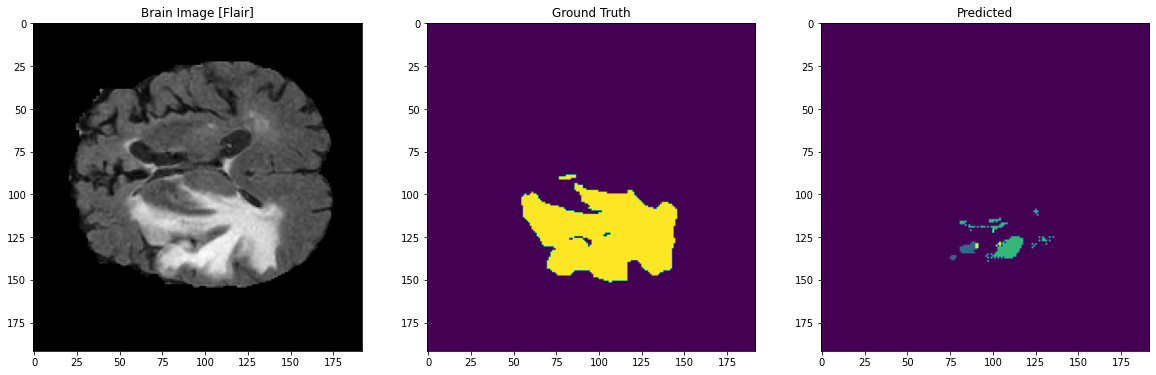

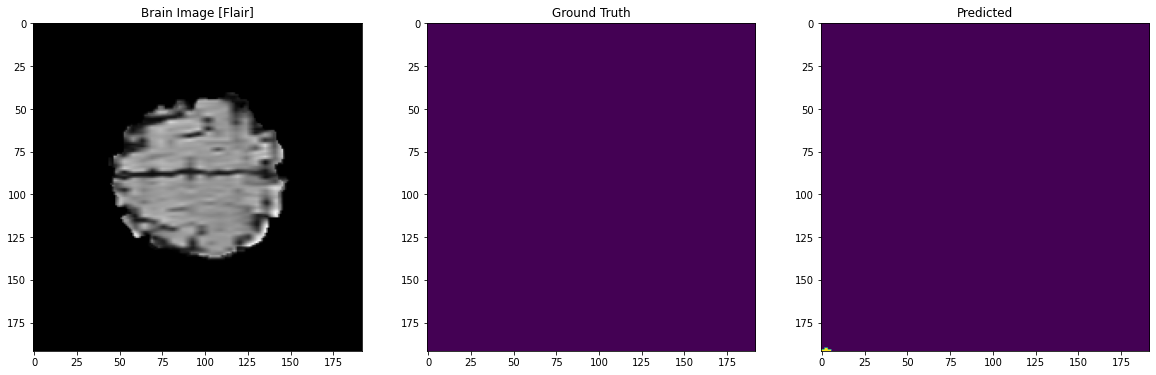

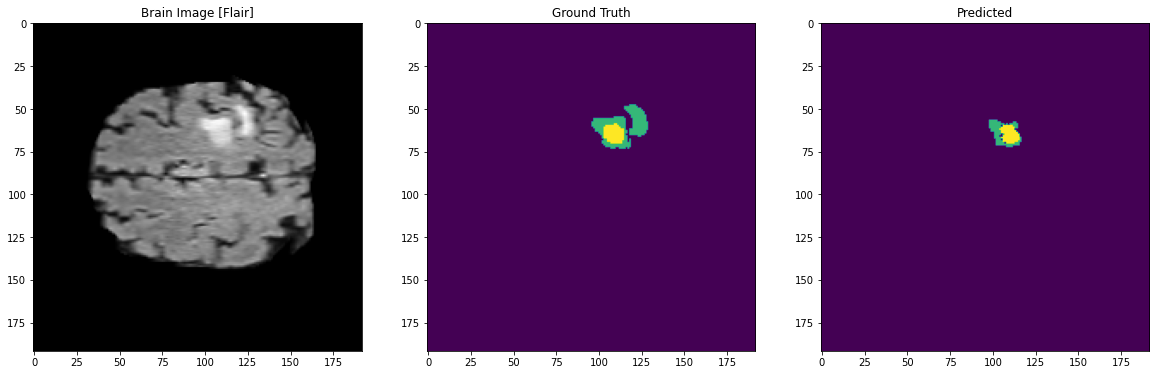

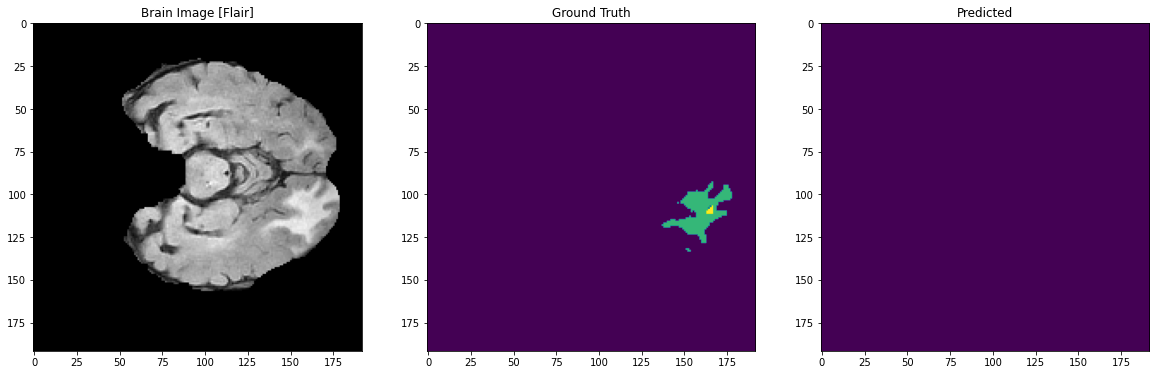

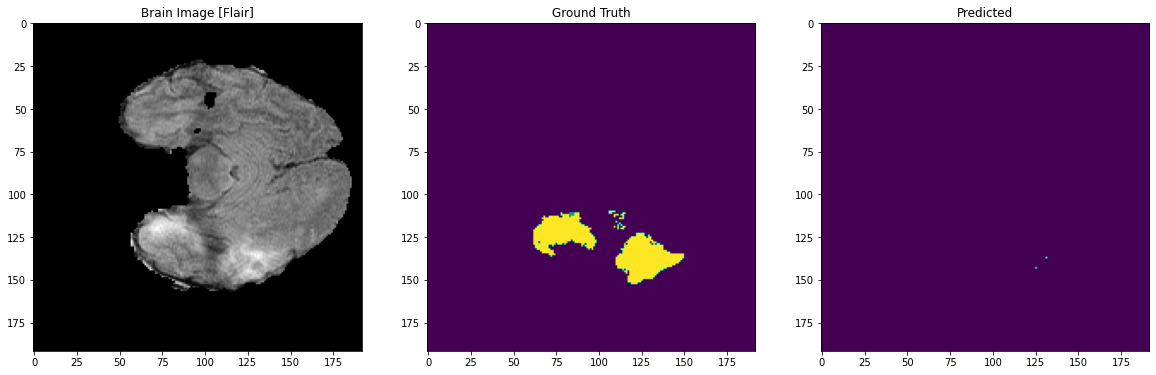

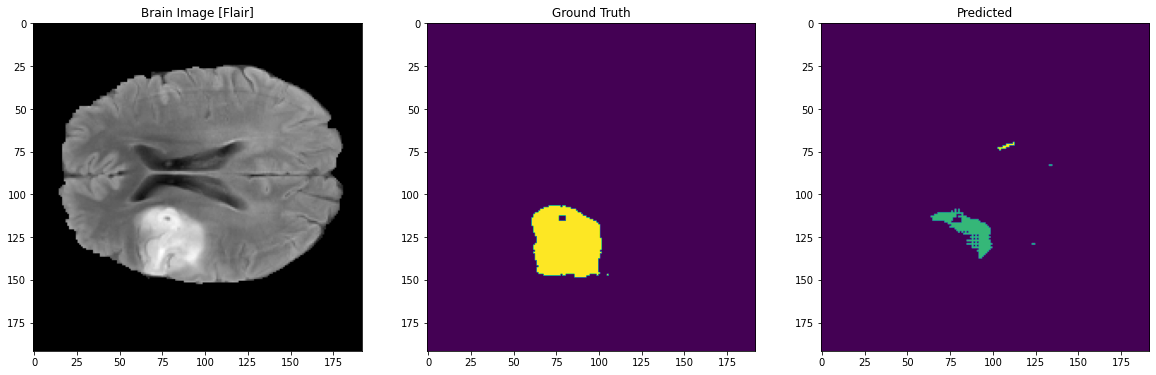

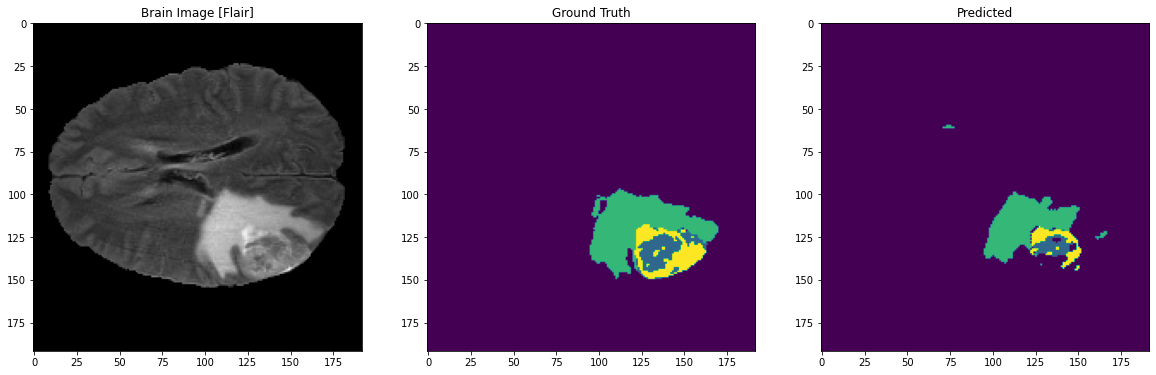

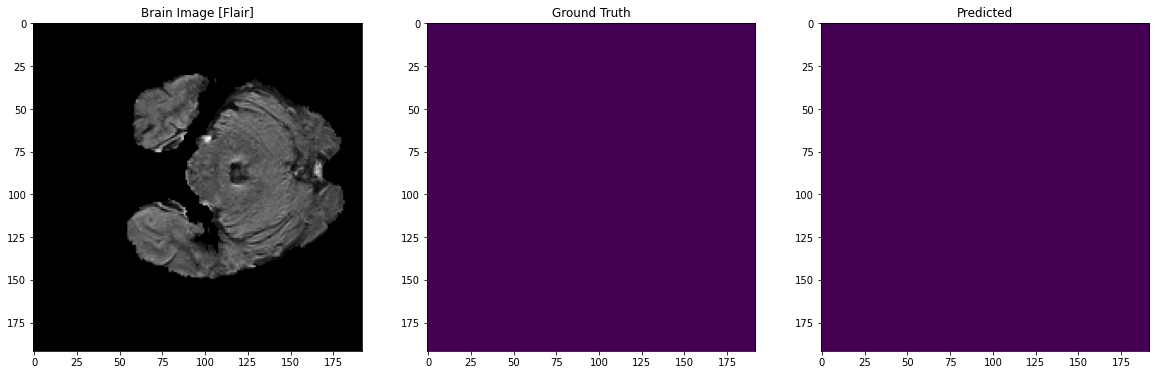

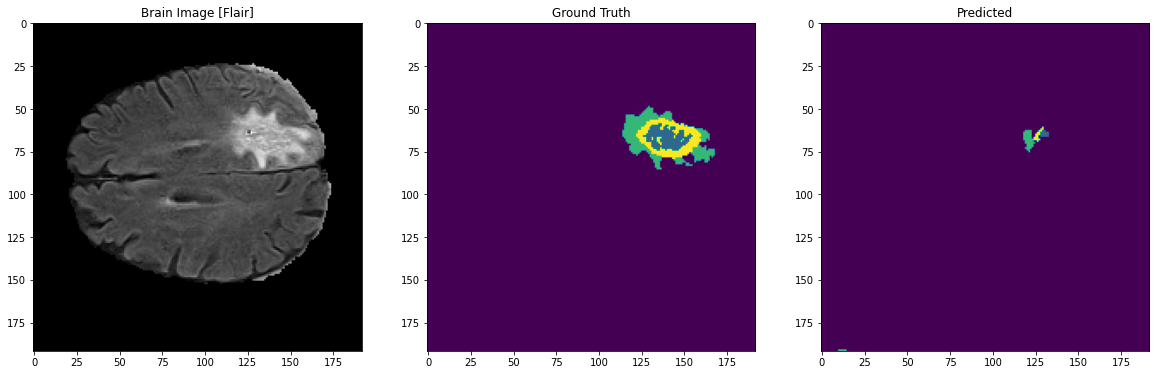

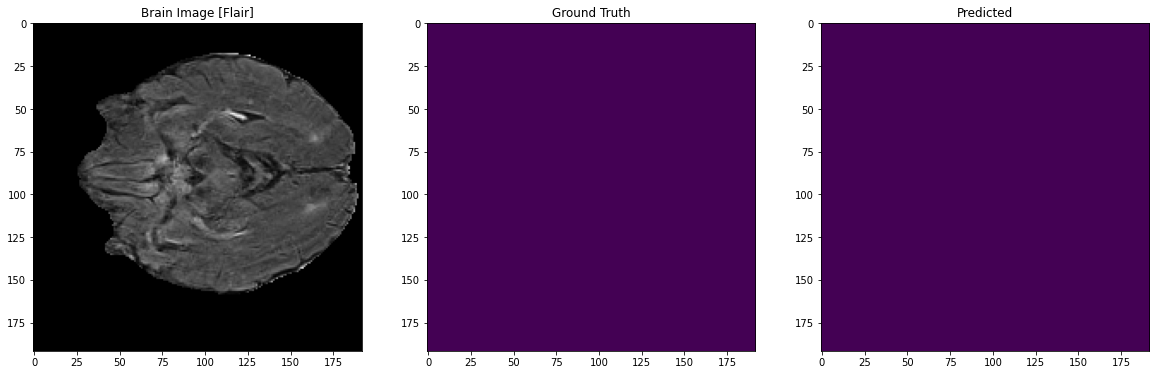

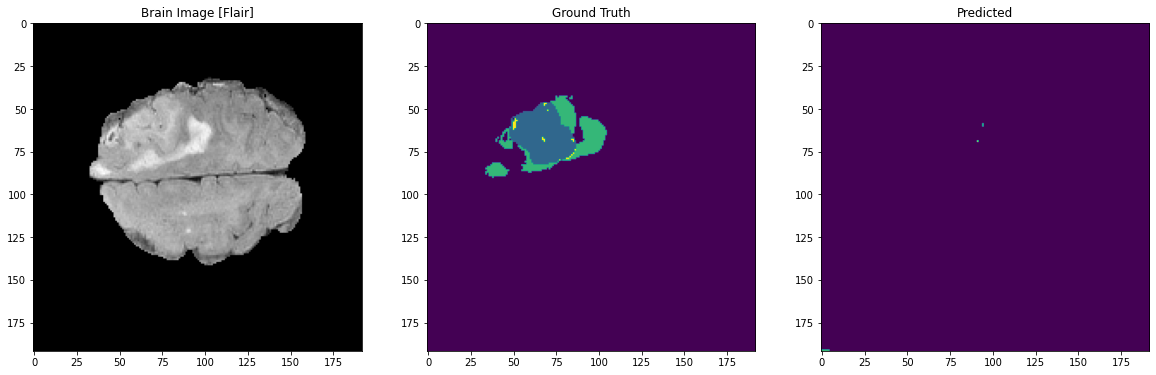

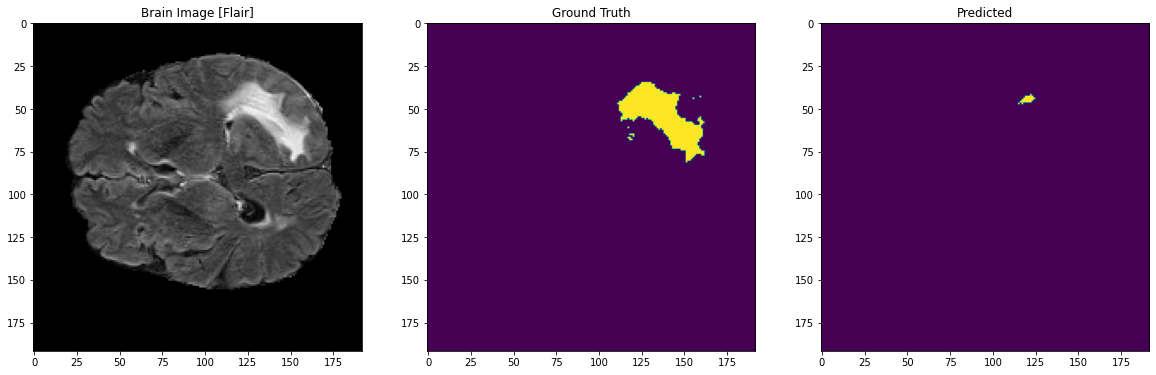

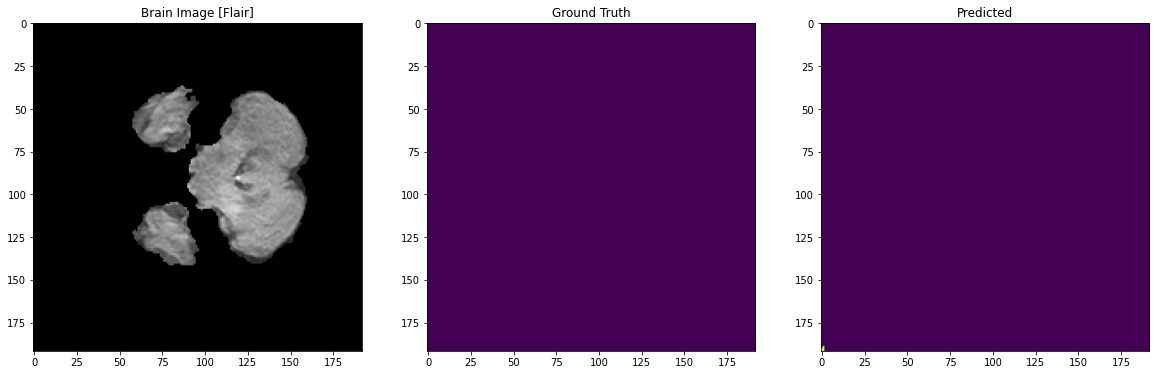

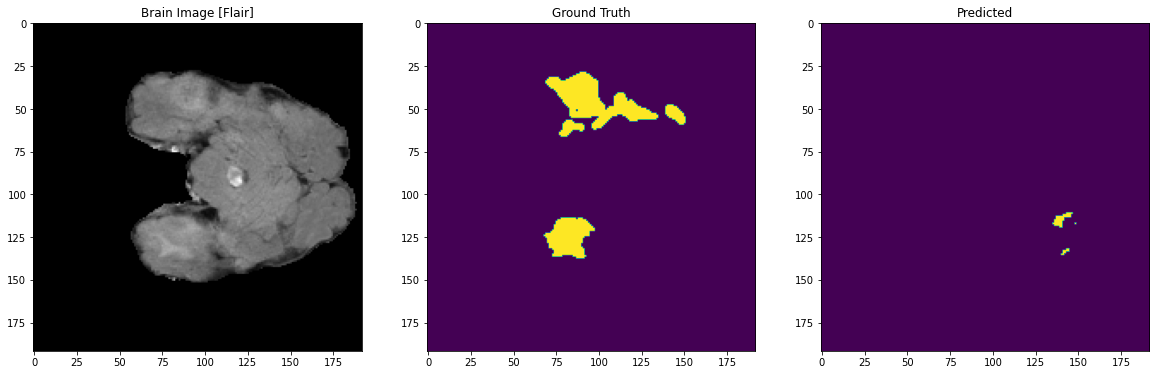

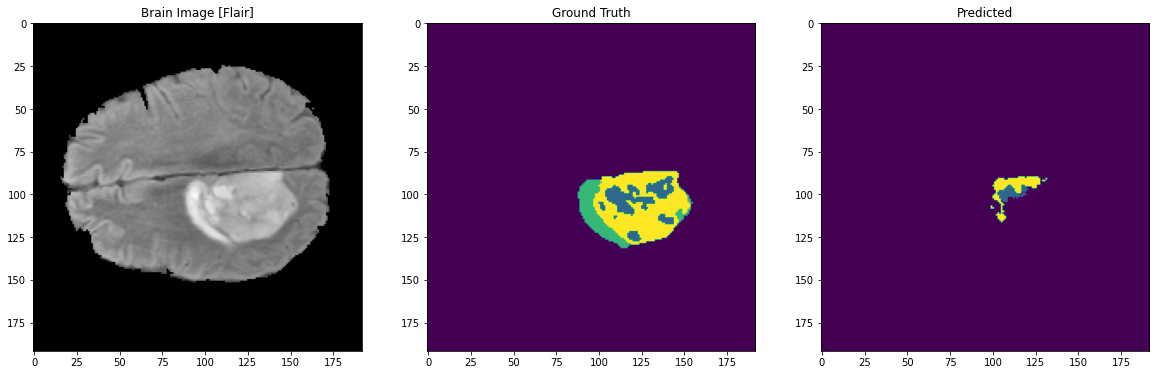

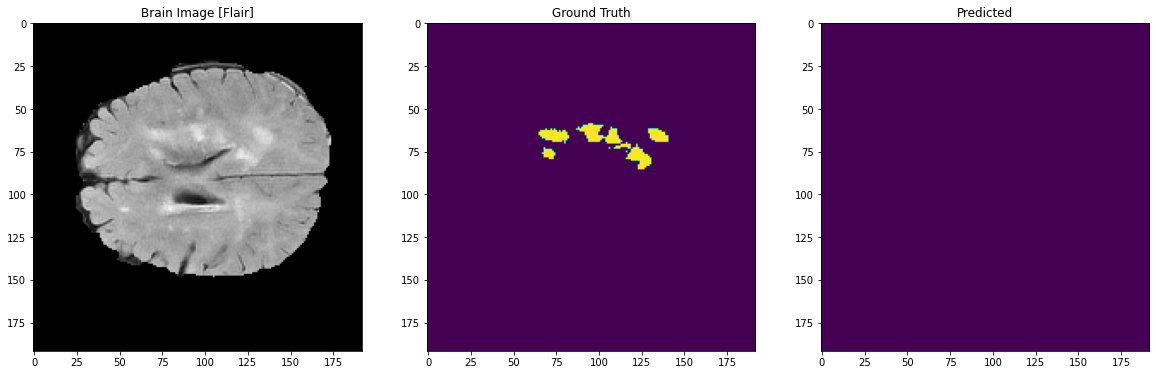

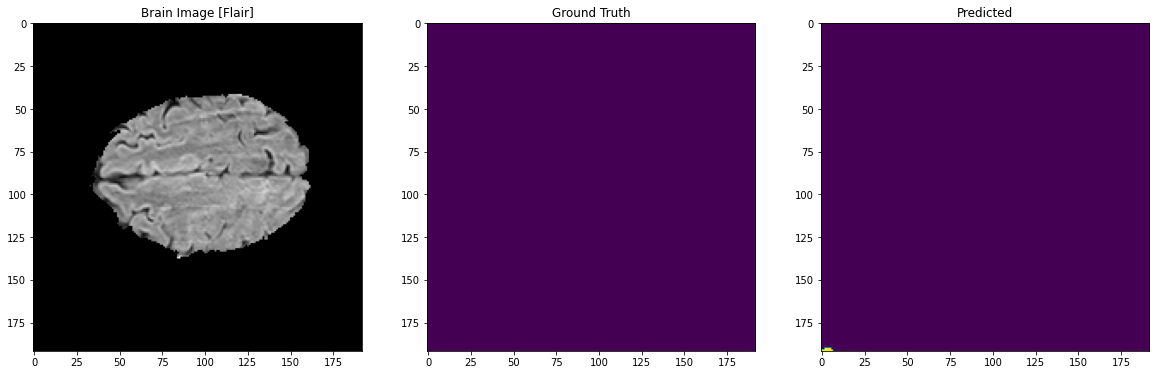

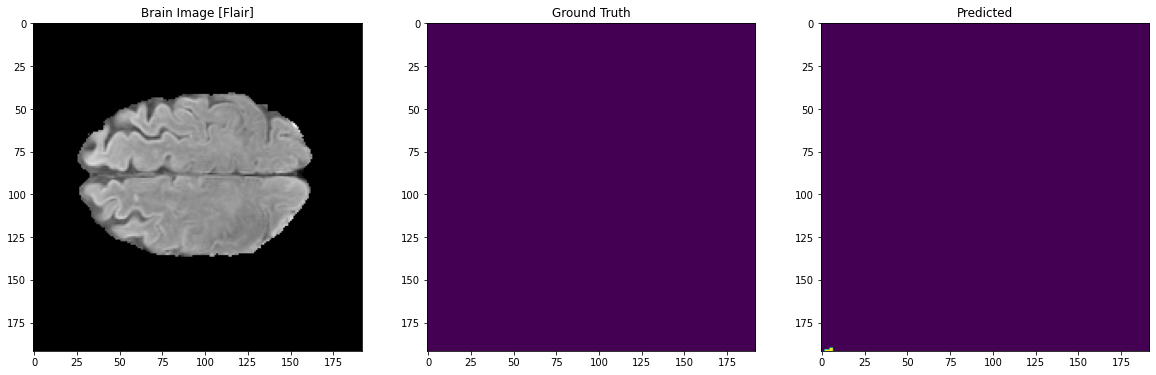

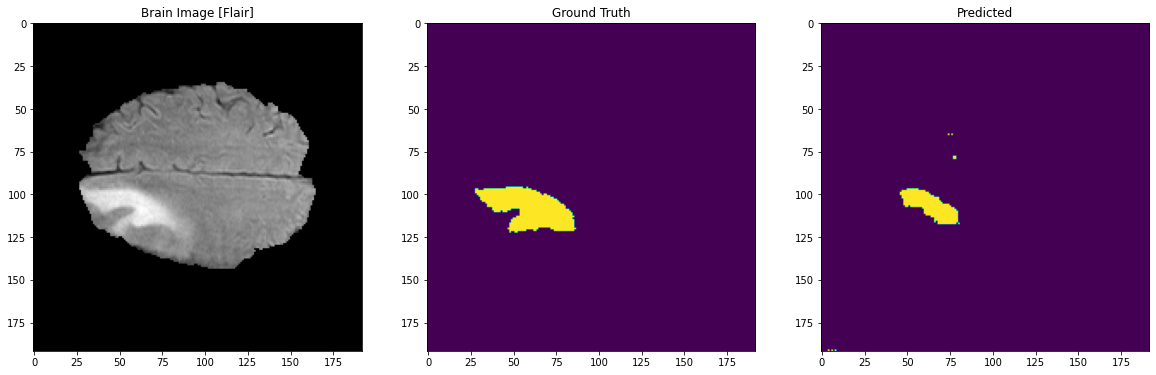

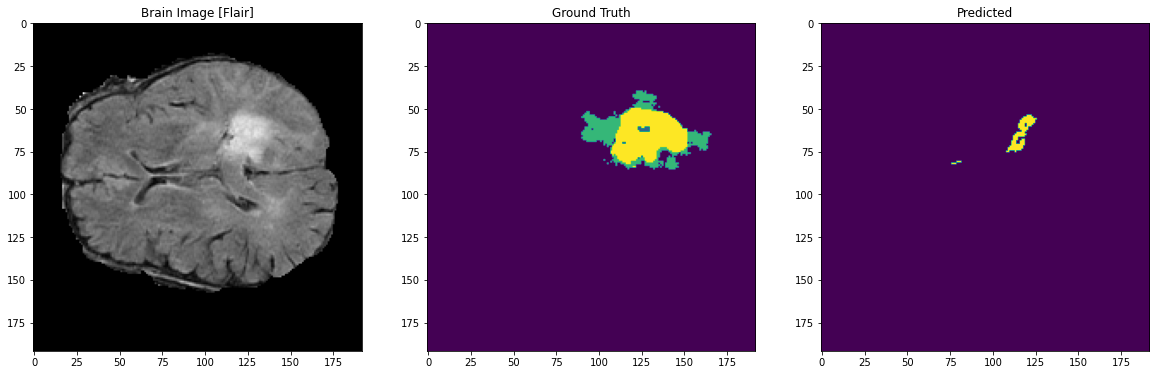

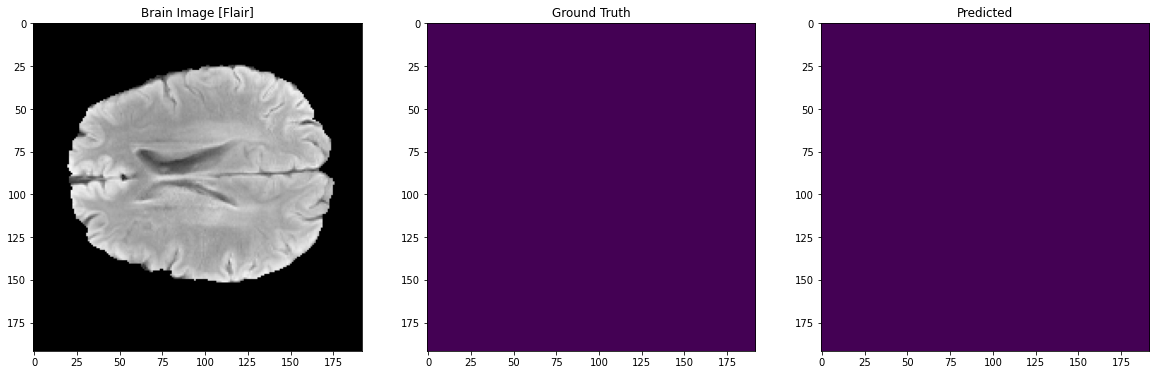

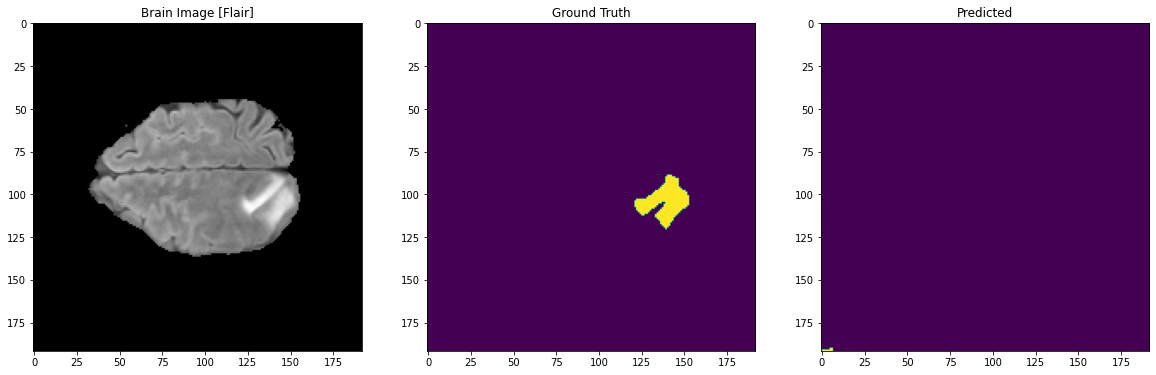

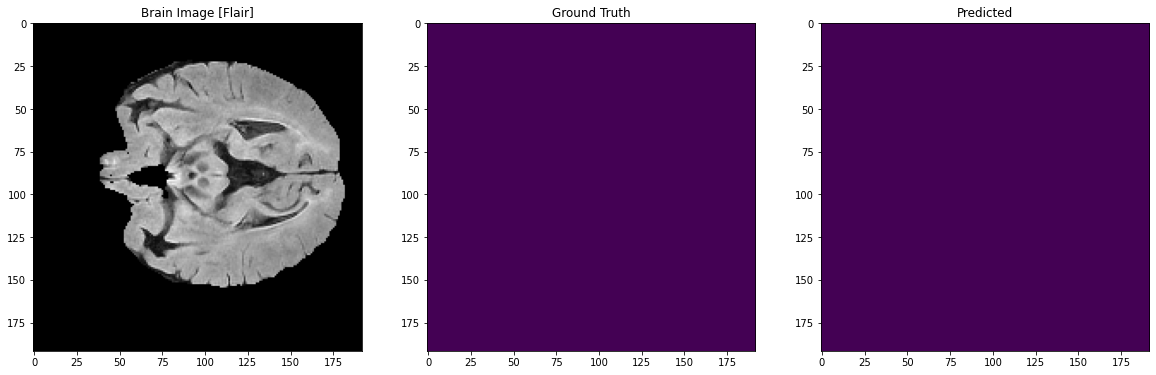

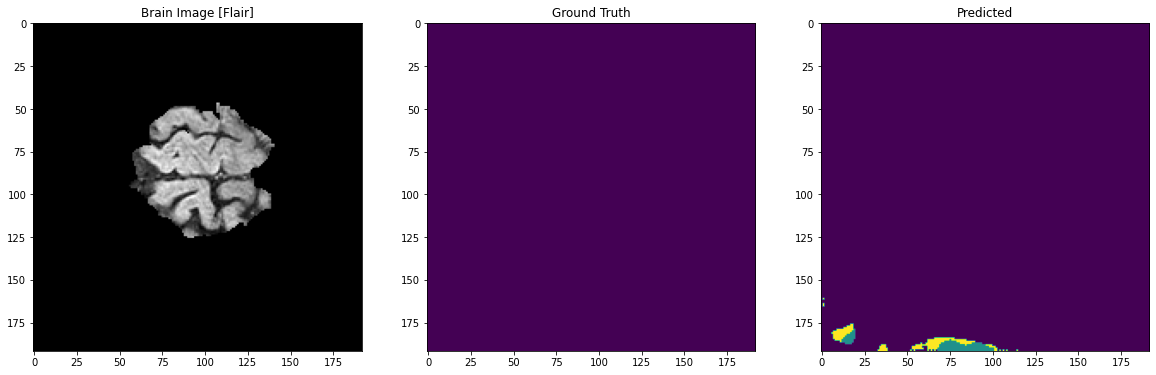

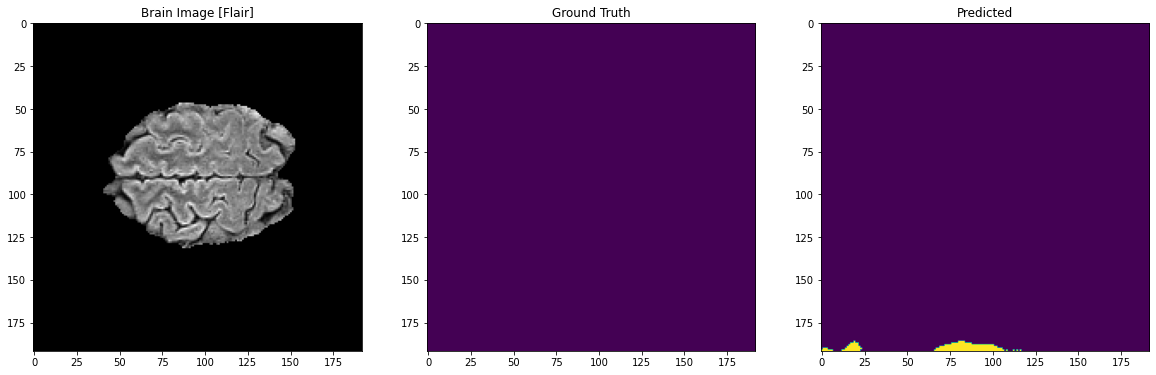

In [34]:
'''
========================================
** Visualization of Predicted results **
========================================
'''

for i in range(2500, 2550):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
    ax1.imshow(X_test[i, :, :, 0], cmap = 'gray')
    ax1.set_title('Brain Image [Flair]')

    ax2.imshow(Y_test[i, :, :, 0])
    ax2.set_title('Ground Truth')

    ax3.imshow(Y_pred[i, :, :, 0 ])
    ax3.set_title('Predicted')
